In [1]:
import numpy as np
import meep as mp
import matplotlib.pyplot as plt

-----------
Initializing structure...
time for choose_chunkdivision = 0.000392914 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 10
time for set_epsilon = 0.0386572 s
-----------


FloatProgress(value=0.0, description='0% done ', max=200.0)

run 0 finished at t = 200.0 (4000 timesteps)


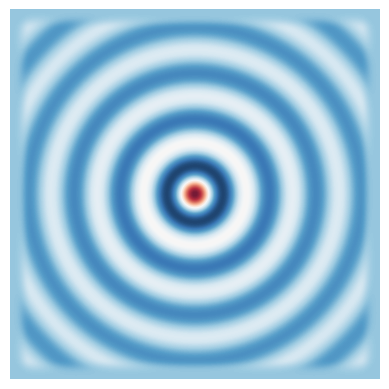

In [10]:
cell = mp.Vector3(16,16,0)
geometry = []
sources = [mp.Source(mp.ContinuousSource(frequency=.25, end_time=10),component=mp.Bz,center=mp.Vector3(0,0)), 
           mp.Source(mp.ContinuousSource(frequency=.5, start_time=10),component=mp.Bz,center=mp.Vector3(0,0)), ]
pml_layers = [mp.PML(1.0)]
# pml_layers = []

resolution = 10
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
sim.run(until=200)

ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Bz)
plt.figure()
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000232935 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 10
time for set_epsilon = 0.0417778 s
-----------


FloatProgress(value=0.0, description='0% done ', max=25.0)

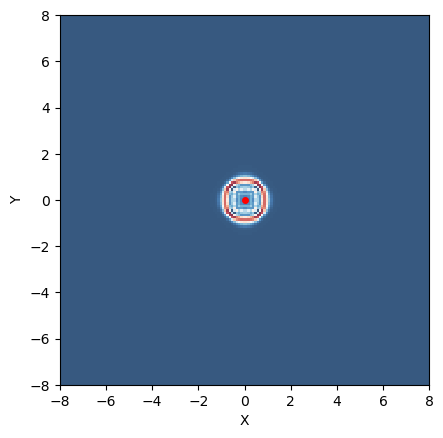

Meep progress: 23.0/25.0 = 92.0% done in 4.1s, 0.4s to go
on time step 460 (time=23), 0.00888413 s/step
run 0 finished at t = 25.0 (500 timesteps)


In [15]:
cell = mp.Vector3(16,16,0)
geometry = []
sources = [mp.Source(mp.ContinuousSource(frequency=.1, end_time=2),component=mp.Bz,center=mp.Vector3(0,0)), 
           ]
pml_layers = [mp.PML(1.0)]

resolution = 10
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
animate = mp.Animate2D(fields=mp.Bz,
                       realtime=True,
                       field_parameters={'alpha':0.8, 'cmap':'RdBu', 'interpolation':'none'},
                       boundary_parameters={'hatch':'o', 'linewidth':1.5, 'facecolor':'y', 'edgecolor':'b', 'alpha':0})
sim.run(mp.at_every(1,animate),until=25);
animate.to_jshtml(fps = 120)

In [4]:
animate.to_gif(fps = 60, filename="./test.gif")

Generating GIF...


In [5]:
ez_data.shap

AttributeError: 'numpy.ndarray' object has no attribute 'shap'

In [ ]:
# plt.figure()
# plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
# plt.axis('off')
# plt.show()